In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, mean_squared_error, roc_curve, auc, roc_auc_score, log_loss, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, GridSearchCV

In [ ]:
# importing dataset
from google.colab import files
uploaded = files.upload()

Saving monks-2.train to monks-2.train


In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving monks-2.test to monks-2.test


In [ ]:
import io
df_train1 = pd.read_csv(io.BytesIO(uploaded['monks-1.train']), names=['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id'], delimiter=' ')

In [ ]:
import io
df_test1 = pd.read_csv(io.BytesIO(uploaded1['monks-1.test']), names=['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id'], delimiter=' ')

## DATA SPLIT

In [ ]:

class DataHandler():
    '''
        Class which offers methods to handle DataFrames oriented to ML problems.
    '''

    def __init__(self, columns_name=[]):
        self.columns_name = columns_name


    def random_dictionary(self, param_space: dict) -> dict:
        '''
            Returns a dictionary with the same keywords of the passed one, associated with a \
            random value choosen by the list associated to any keyword.\n
            - param_space: dictionary of associations with the following format:\n
                \t'keyword': [value1, ... ,valueN]
        '''
        params = {}

        # Inserts of the keywords with the random values into the dictionary
        for key in param_space.keys():
            params[key] = np.random.choice(param_space[key])

        return params


    def load_data(self, path: str) -> pd.DataFrame:
        '''
            Returns the DataFrame associated to the Data set found at path \"path\".\n
            - path: path to the CSV file with data.
        '''
        return pd.read_csv(filepath_or_buffer=path, names=self.columns_name, delimiter=' ')


    def split_data(self, data: pd.DataFrame, target_col: str, drop_cols: list):
        '''
            Returns a tuple of two new DataFrames: (x,y).\n
            - x: is like \"df\" without the columns specified in the list \"drop_cols\".\n
            - y: is the column indentified by the key \"target_col\".\n
            The parameters are:\n
            - df: the input DataFrame.\n
            - target_col: name of the target column.\n
            - drop_cols: list of columns' name to drop.
        '''
        y = data[target_col].copy(deep=True)
        x = data.drop(columns=drop_cols, axis=1).copy(deep=True)
        return x, y


    def one_hot_encoding(self, data: pd.DataFrame):
        '''
            Returns the DataFrame got by appling the 1-Hot Encoding to the DataFrame \
            passed as parameter.\n
            - df: the DataFrame to whom is applied the 1-Hot Encoding.
        '''

        # Creation of a Deep Copy of the original DataFrame
        df = data.copy(deep=True)

        # For each column we apply the dummies method
        for column in data.columns:

            # Applies one-hot encoding to current column and renames them
            one_hot_cols = pd.get_dummies(df[column], dtype=float)
            one_hot_cols = one_hot_cols.set_axis([column+'_'+str(col) for col in one_hot_cols.columns], axis=1)

            # Drops of the original column and adds the new columns
            df = df.drop(column, axis=1)
            df = pd.concat([df,one_hot_cols], axis=1)

        return df


In [ ]:
data_handler = DataHandler(['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id'])

# Number of different Datasets
datasets_number = 1

'''# Lists of DataFrames
df_train1 : list[pd.DataFrame] = []
df_test1  : list[pd.DataFrame] = []'''



'# Lists of DataFrames\ndf_train1 : list[pd.DataFrame] = []\ndf_test1  : list[pd.DataFrame] = []'

In [ ]:

# Function to split data into features and labels
def split_data(data, target_col, drop_cols):
    # Assuming 'target_col' is the target column name
    y = data[target_col]

    # Assuming 'drop_cols' is a list of columns to drop
    x = data.drop(columns=drop_cols)

    return x, y

# Lists to store training and testing data
x_train_list = []
y_train_list = []
x_test_list = []
y_test_list = []

# Split each dataset into features and labels
# Split training data
x_train, y_train = split_data(df_train1, target_col='target', drop_cols=['target', 'id'])
x_train_list.append(x_train)
y_train_list.append(y_train)

# Split testing data
x_test, y_test = split_data(df_test1, target_col='target', drop_cols=['target', 'id'])
x_test_list.append(x_test)
y_test_list.append(y_test)


## 1-HOT ENCODING

In [ ]:
# Applies the 1-Hot Encoding to the "x" data
for i in range(datasets_number):
    x_train = data_handler.one_hot_encoding(x_train)
    x_test  = data_handler.one_hot_encoding(x_test)

    # Print of the data modified
    print(f"Monk 1 [TRAIN]: " + str(x_train.shape))
    print(f"Monk 1 [TEST]: " + str(x_test.shape))

Monk 1 [TRAIN]: (169, 17)
Monk 1 [TEST]: (432, 17)


Basta fare grid search di sklearn che ha già il metodo, copi gli altri iperparametri delle altre grid e avvi cross val score
###### IMPORTANTE LEGGERE #####

Usare solo TANH, niente relu
Usare solo SGD, tanto Adam lo odia e comunque SGD è quello che performa meglio
I learning rate vanno un po' abbassati
I weight decay per monk1 e monk2 NON servono, monk3 SI e per monk3 serve grafico con e grafico senza come chiede il report
sklearn implementa MLPclassifier e anche una sua random grid search (tu li dai i parametri tuoi)
e anche un suo cross validatio cioè cross val score0:
per monk1 partite da questi iperparametri
 {
        'input_units': [17],
        'hidden_units': [3, 4, 5],
        'patience': [10,100,200],
        'factor_lr_dec': [0.5, 1],
        'step_decay': [500, 1000, 1500],
        'learning_rate': [float(i/10) for i in range(1,10)] + [float(i/100) for i in range(1,10)] + [0.99, 0.999],
        'batch_size': [15, 16, 17, 31, 32, 62, 63, 64, 65],
        'epochs': [int(350+epochs) for epochs in range(0,200,10)],
        'weight_init': ['glorot_normal', 'lecun_normal', 'he_normal', 'he_uniform'],
        'momentum': [float(i/10) for i in range(3,9)],
        'activation': ['tanh'],
        'output_activation': ['sigmoid'],
        'metrics': ['accuracy'],
    },

Mi dicono c'è da diminuire i batch
Quindi tipo usare 1,2,3,4,5,6,7 nella grid


## TRAINING

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=340, momentum=0.6, nesterovs_momentum=True, shuffle=True, solver=sgd; total time=   0.4s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=340, momentum=0.6, nesterovs_momentum=True, shuffle=True, solver=sgd; total time=   0.4s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=340, momentum=0.6, nesterovs_momentum=True, shuffle=True, solver=sgd; total time=   0.3s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=340, momentum=0.6, nesterovs_momentum=True, shuffle=True, solver=sgd; total time=   0.3s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=340, momentum=0.6, nesterovs_momentum=True, shuffle=True, solver=sgd; total time=   0.4s
[CV]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=8, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=340, momentum=0.7, nesterovs_momentum=False, shuffle=True, solver=sgd; total time=   0.2s
[CV] END activation=tanh, batch_size=8, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=340, momentum=0.7, nesterovs_momentum=False, shuffle=True, solver=sgd; total time=   0.2s
[CV] END activation=tanh, batch_size=8, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=340, momentum=0.7, nesterovs_momentum=False, shuffle=True, solver=sgd; total time=   0.2s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=340, momentum=0.6, nesterovs_momentum=True, shuffle=True, solver=sgd; total time=   0.3s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=340, momentum=0.6, nesterovs_momentum=True, shuffle=True, solver=sgd; total time=   0.2s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

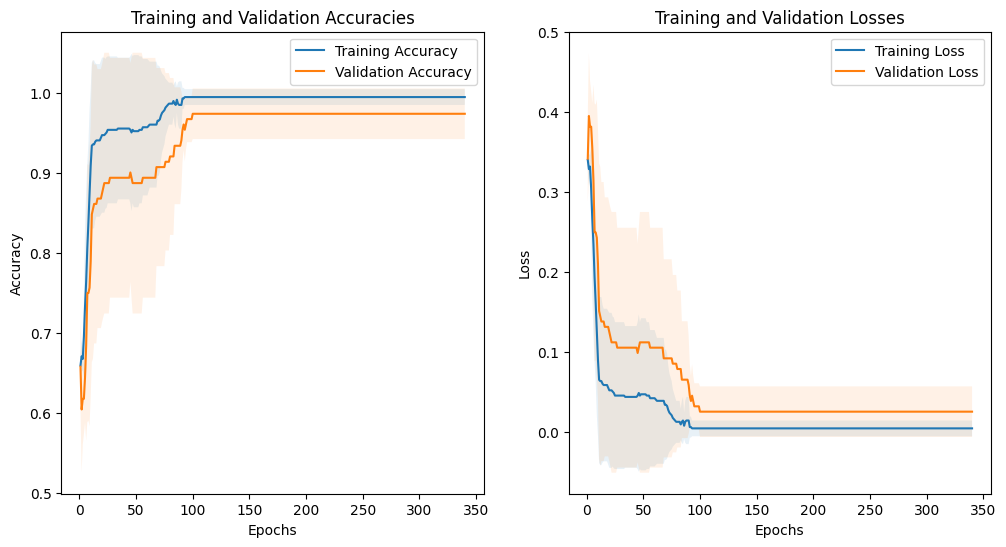

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)

# Initialize lists to store performance metrics
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Define parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(3,)],
    'learning_rate_init': [0.3],
    'momentum': [0.6, 0.7],
    'nesterovs_momentum': [True, False],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'batch_size': [4, 6, 8, 16],
    'shuffle': [True],
    'max_iter': [340],
}

# Create a KFold instance
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Iterate through each fold in the KFold cross-validation
for train_index, val_index in kfold.split(x_train, y_train):
    x_tr, x_val = x_train.iloc[train_index], x_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create MLPClassifier instance
    mlp = MLPClassifier(random_state=seed)

    # Create GridSearchCV instance
    grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, verbose=2)

    # Fit the MLPClassifier using the current training fold and hyperparameters
    grid_search.fit(x_tr, y_tr)

    # Get best hyperparameters and initialize MLPClassifier with them
    best_params = grid_search.best_params_
    mlp_best = MLPClassifier(**best_params, random_state=seed)

    # Lists to store accuracies and losses for each epoch in this fold
    fold_train_accuracies = []
    fold_val_accuracies = []
    fold_train_losses = []
    fold_val_losses = []

    # Train the model for a fixed number of epochs
    epochs = 340
    for epoch in range(1, epochs + 1):
        # Fit the model for one epoch
        mlp_best.partial_fit(x_tr, y_tr, classes=np.unique(y_tr), random_state=seed)

        # Predictions on training and validation sets
        y_train_pred = mlp_best.predict(x_tr)
        y_val_pred = mlp_best.predict(x_val)

        # Compute training and validation accuracy
        train_accuracy = accuracy_score(y_tr, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        # Compute Mean Squared Error (MSE) for training and validation sets
        train_error = mean_squared_error(y_tr, y_train_pred)
        val_error = mean_squared_error(y_val, y_val_pred)

        # Store accuracies and errors for each epoch
        fold_train_accuracies.append(train_accuracy)
        fold_val_accuracies.append(val_accuracy)
        fold_train_losses.append(train_error)
        fold_val_losses.append(val_error)

    # Store fold-wise accuracies and losses
    train_accuracies.append(fold_train_accuracies)
    val_accuracies.append(fold_val_accuracies)
    train_losses.append(fold_train_losses)
    val_losses.append(fold_val_losses)

# Calculate mean and standard deviation for training and validation accuracies and losses
mean_train_accuracies = np.mean(train_accuracies, axis=0)
std_train_accuracies = np.std(train_accuracies, axis=0)
mean_val_accuracies = np.mean(val_accuracies, axis=0)
std_val_accuracies = np.std(val_accuracies, axis=0)

mean_train_losses = np.mean(train_losses, axis=0)
std_train_losses = np.std(train_losses, axis=0)
mean_val_losses = np.mean(val_losses, axis=0)
std_val_losses = np.std(val_losses, axis=0)

# Print final retraining metrics
print("\nFinal Retraining Metrics:")
print("Mean Training Accuracy: ", np.mean(mean_train_accuracies))
print("Mean Validation Accuracy: ", np.mean(mean_val_accuracies))
print("Mean Training Loss: ", np.mean(mean_train_losses))
print("Mean Validation Loss: ", np.mean(mean_val_losses))
print("Standard deviation training accuracies: ", np.std(std_train_accuracies))
print("Standard deviation Training losses: ", np.std(std_train_losses))
print("Standard deviation Validation accuracies: ", np.std(std_val_accuracies))
print("Standard deviation Validation losses: ", np.std(std_val_losses))

# Plot learning curves
plt.figure(figsize=(12, 6))

# Plotting accuracies
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), mean_train_accuracies, label='Training Accuracy')
plt.fill_between(range(1, epochs + 1), mean_train_accuracies - std_train_accuracies,
                 mean_train_accuracies + std_train_accuracies, alpha=0.1)
plt.plot(range(1, epochs + 1), mean_val_accuracies, label='Validation Accuracy')
plt.fill_between(range(1, epochs + 1), mean_val_accuracies - std_val_accuracies,
                 mean_val_accuracies + std_val_accuracies, alpha=0.1)
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting losses
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), mean_train_losses, label='Training Loss')
plt.fill_between(range(1, epochs + 1), mean_train_losses - std_train_losses,
                 mean_train_losses + std_train_losses, alpha=0.1)
plt.plot(range(1, epochs + 1), mean_val_losses, label='Validation Loss')
plt.fill_between(range(1, epochs + 1), mean_val_losses - std_val_losses,
                 mean_val_losses + std_val_losses, alpha=0.1)
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.plot



Final Retraining Metrics:
Mean Training Accuracy:  0.9940015325302234
Mean Validation Accuracy:  0.9932512844710076
Mean Training Loss:  0.005998467469776581
Mean Validation Loss:  0.006748715528992345


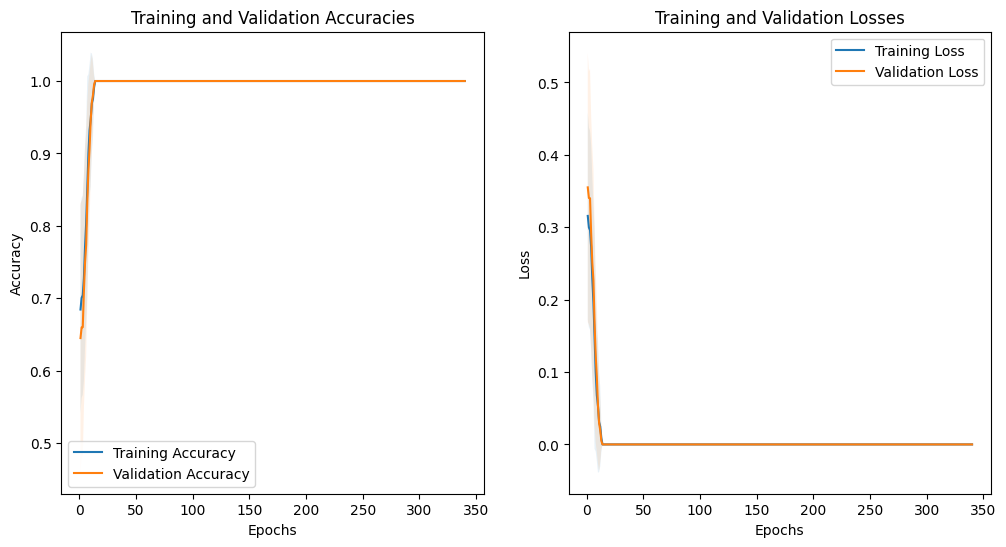

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

mlp_best = MLPClassifier(**best_params, random_state=41)

# Lists to store accuracies and losses for each epoch in this fold
fold_train_accuracies = []
fold_val_accuracies = []
fold_train_losses = []
fold_val_losses = []

# Train the model for a fixed number of epochs
epochs = 340
for epoch in range(1, epochs + 1):
    # Fit the model for one epoch
    mlp_best.fit(x_train, y_train)

    # Predictions on training and validation sets
    y_train_pred = mlp_best.predict(x_train)
    y_val_pred = mlp_best.predict(x_valid)

    # Compute training and validation accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_valid, y_val_pred)

    # Compute Mean Squared Error (MSE) for training and validation sets
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_valid, y_val_pred)

    # Store accuracies and errors for each epoch
    fold_train_accuracies.append(train_accuracy)
    fold_val_accuracies.append(val_accuracy)
    fold_train_losses.append(train_error)
    fold_val_losses.append(val_error)

# Store fold-wise accuracies and losses
train_accuracies.append(fold_train_accuracies)
val_accuracies.append(fold_val_accuracies)
train_losses.append(fold_train_losses)
val_losses.append(fold_val_losses)

# Calculate mean and standard deviation for training and validation accuracies and losses
mean_train_accuracies = np.mean(train_accuracies, axis=0)
std_train_accuracies = np.std(train_accuracies, axis=0)
mean_val_accuracies = np.mean(val_accuracies, axis=0)
std_val_accuracies = np.std(val_accuracies, axis=0)

mean_train_losses = np.mean(train_losses, axis=0)
std_train_losses = np.std(train_losses, axis=0)
mean_val_losses = np.mean(val_losses, axis=0)
std_val_losses = np.std(val_losses, axis=0)

# Plot learning curves
plt.figure(figsize=(12, 6))

# Plotting accuracies
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), mean_train_accuracies, label='Training Accuracy')
plt.fill_between(range(1, epochs + 1), mean_train_accuracies - std_train_accuracies,
                 mean_train_accuracies + std_train_accuracies, alpha=0.1)
plt.plot(range(1, epochs + 1), mean_val_accuracies, label='Validation Accuracy')
plt.fill_between(range(1, epochs + 1), mean_val_accuracies - std_val_accuracies,
                 mean_val_accuracies + std_val_accuracies, alpha=0.1)
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting losses
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), mean_train_losses, label='Training Loss')
plt.fill_between(range(1, epochs + 1), mean_train_losses - std_train_losses,
                 mean_train_losses + std_train_losses, alpha=0.1)
plt.plot(range(1, epochs + 1), mean_val_losses, label='Validation Loss')
plt.fill_between(range(1, epochs + 1), mean_val_losses - std_val_losses,
                 mean_val_losses + std_val_losses, alpha=0.1)
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.plot

# Print final retraining metrics
print("\nFinal Retraining Metrics:")
print("Mean Training Accuracy: ", np.mean(mean_train_accuracies))
print("Mean Validation Accuracy: ", np.mean(mean_val_accuracies))
print("Mean Training Loss: ", np.mean(mean_train_losses))
print("Mean Validation Loss: ", np.mean(mean_val_losses))


In [ ]:
# Evaluate on the test set
y_true, y_pred = y_test, mlp_best.predict(x_test)

# Display results on the test set
print('\nResults on the test set:')
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_true, y_pred))

# Plot learning curves for accuracy and error on the test set
test_accuracies = []
test_errors = []

# Compute accuracy and error on the entire test set
test_accuracy = accuracy_score(y_test, y_pred)
test_error = mean_squared_error(y_test, y_pred)

# Store accuracy and error for the entire test set
test_accuracies.append(test_accuracy)
test_errors.append(test_error)



Results on the test set:
Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432

